In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from google.colab import data_table

In [ ]:
data_table.enable_dataframe_formatter()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rgr=pd.read_csv("/content/drive/MyDrive/RGR/rgr_data_test.csv")

In [ ]:
rgr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31038 entries, 0 to 31037
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   RIDER_ID                         31038 non-null  int64  
 1   LOCATION                         31038 non-null  object 
 2   APPLICATION_DATE                 30024 non-null  object 
 3   APPLICATION_APPROVED_DATE        30078 non-null  object 
 4   FIRST_WORK_DATE                  31038 non-null  object 
 5   ACQUISITION_CHANNEL              31038 non-null  object 
 6   VEHICLE_TYPE                     31038 non-null  object 
 7   DAYS_SINCE_ACQUISITION           31038 non-null  int64  
 8   HOURS_WORKED_CUMULATIVE          31038 non-null  float64
 9   ORDERS_DELIVERED_CUMULATIVE      31038 non-null  int64  
 10  THROUGHPUT_CUMULATIVE            31038 non-null  float64
 11  REFERRALS_CUMULATIVE             4056 non-null   float64
 12  SUCCESSFUL_REFERRA

In [ ]:
rgr.describe()

,RIDER_ID,DAYS_SINCE_ACQUISITION,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE
count,31038.000000,31038.000000,31038.000000,31038.000000,31038.000000,31038.000000,31038.000000
mean,80934.348347,59.500000,88.131536,180.793608,1.874058,0.264643,0.049230
std,12777.801095,55.081888,144.440770,329.754352,0.704813,1.988531,0.308861
min,1864.000000,7.000000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,70990.000000,14.000000,15.700000,26.000000,1.460000,0.000000,0.000000
50%,77741.000000,42.000000,37.100000,67.000000,1.940000,0.000000,0.000000
75%,94220.000000,84.000000,94.300000,180.000000,2.350000,0.000000,0.000000
max,103776.000000,168.000000,2042.400000,4856.000000,6.150000,286.000000,27.000000


In [ ]:
rgr['ACQUISITION_CHANNEL'].unique()

array(['Organic', 'Referral', 'Offline', 'Digital', 'Unknown',
       'Job Platforms'], dtype=object)

In [ ]:
df=rgr

In [ ]:
#handling missing values
df['SUCCESSFUL_REFERRALS_CUMULATIVE']=np.where(pd.isna(df['SUCCESSFUL_REFERRALS_CUMULATIVE'])==True,0,df['SUCCESSFUL_REFERRALS_CUMULATIVE'])
df['REFERRALS_CUMULATIVE']=np.where(pd.isna(df['REFERRALS_CUMULATIVE'])==True,0,df['REFERRALS_CUMULATIVE'])

# Performance Metric Analysis


1.   PRODUCTIVITY - Hours worked, Orders delivered & Throughput
> Statistical Significance of Productivity metrics across RGR vs non-RGR channels
   - Throughput analysis based on vehicle-type
   - Throughput analysis based on location

2.   ACQUISITION/REFERRAL
   - Pareto Rule analysis

3.   CONVERSION
4.   RETENTION
5.   APPLICATION APPROVAL TAT
6.   TIME TO START WORKING
   - Impact of time to start working on Throughput
   - Impact of time to start working on Referral







1. PRODUCTIVITY

In [ ]:
# Grouping by 'ACQUISITION_CHANNEL' and 'RIDER_ID' and getting the maximum value for each group
grouped_df = df.groupby(['ACQUISITION_CHANNEL', 'RIDER_ID']).max().reset_index()


# Summarize the performance metrics for each acquisition channel
performance_metrics = ['HOURS_WORKED_CUMULATIVE', 'ORDERS_DELIVERED_CUMULATIVE',
                       'REFERRALS_CUMULATIVE', 'SUCCESSFUL_REFERRALS_CUMULATIVE']

summary_df = grouped_df.groupby('ACQUISITION_CHANNEL')[performance_metrics].sum()
summary_df['AVG_THROUGHPUT_PER_RIDER'] = grouped_df.groupby('ACQUISITION_CHANNEL')['THROUGHPUT_CUMULATIVE'].mean()
summary_df['NUM_RIDERS'] = grouped_df.groupby('ACQUISITION_CHANNEL')['RIDER_ID'].nunique()

summary_df


,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE,AVG_THROUGHPUT_PER_RIDER,NUM_RIDERS
ACQUISITION_CHANNEL,,,,,,
Digital,116081.4,230873,561.0,88.0,1.872636,751
Job Platforms,12667.7,25983,19.0,5.0,1.865672,67
Offline,54888.8,117673,205.0,47.0,1.948919,296
Organic,518401.3,1150283,1325.0,258.0,2.121144,2735
Referral,322745.5,699485,1191.0,318.0,2.086102,1216
Unknown,28170.8,57172,60.0,10.0,2.154630,108


In [ ]:
# Calculating performance metrics per rider for each channel
summary_df['HOURS_WORKED_PER_RIDER'] = summary_df['HOURS_WORKED_CUMULATIVE'] / summary_df['NUM_RIDERS']
summary_df['ORDERS_DELIVERED_PER_RIDER'] = summary_df['ORDERS_DELIVERED_CUMULATIVE'] / summary_df['NUM_RIDERS']
summary_df['REFERRALS_PER_RIDER'] = summary_df['REFERRALS_CUMULATIVE'] / summary_df['NUM_RIDERS']
summary_df['SUCCESSFUL_REFERRALS_PER_RIDER'] = summary_df['SUCCESSFUL_REFERRALS_CUMULATIVE'] / summary_df['NUM_RIDERS']

summary_df=summary_df.reset_index()
summary_df

,ACQUISITION_CHANNEL,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE,AVG_THROUGHPUT_PER_RIDER,NUM_RIDERS,HOURS_WORKED_PER_RIDER,ORDERS_DELIVERED_PER_RIDER,REFERRALS_PER_RIDER,SUCCESSFUL_REFERRALS_PER_RIDER
0,Digital,116081.4,230873,561.0,88.0,1.872636,751,154.569108,307.420772,0.747004,0.117177
1,Job Platforms,12667.7,25983,19.0,5.0,1.865672,67,189.070149,387.805970,0.283582,0.074627
2,Offline,54888.8,117673,205.0,47.0,1.948919,296,185.435135,397.543919,0.692568,0.158784
3,Organic,518401.3,1150283,1325.0,258.0,2.121144,2735,189.543437,420.578793,0.484461,0.094333
4,Referral,322745.5,699485,1191.0,318.0,2.086102,1216,265.415707,575.234375,0.979441,0.261513
5,Unknown,28170.8,57172,60.0,10.0,2.154630,108,260.840741,529.370370,0.555556,0.092593


In [ ]:
summary_perf_df=summary_df[['ACQUISITION_CHANNEL','NUM_RIDERS','HOURS_WORKED_PER_RIDER','ORDERS_DELIVERED_PER_RIDER',
                            'REFERRALS_PER_RIDER','SUCCESSFUL_REFERRALS_PER_RIDER','AVG_THROUGHPUT_PER_RIDER']]
summary_perf_df

,ACQUISITION_CHANNEL,NUM_RIDERS,HOURS_WORKED_PER_RIDER,ORDERS_DELIVERED_PER_RIDER,REFERRALS_PER_RIDER,SUCCESSFUL_REFERRALS_PER_RIDER,AVG_THROUGHPUT_PER_RIDER
0,Digital,751,154.569108,307.420772,0.747004,0.117177,1.872636
1,Job Platforms,67,189.070149,387.805970,0.283582,0.074627,1.865672
2,Offline,296,185.435135,397.543919,0.692568,0.158784,1.948919
3,Organic,2735,189.543437,420.578793,0.484461,0.094333,2.121144
4,Referral,1216,265.415707,575.234375,0.979441,0.261513,2.086102
5,Unknown,108,260.840741,529.370370,0.555556,0.092593,2.154630


In [ ]:
summary_perf_df.to_csv('/content/drive/MyDrive/RGR/performance_table.csv')

In [ ]:
#storing dataframe in a spreadsheet
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

sh = gc.create('Performance Metrics Sheet')

worksheet = gc.open('Performance Metrics Sheet')
sheet1 = worksheet.sheet1

sheet1.update([summary_perf_df.columns.values.tolist()] + summary_perf_df.fillna(-1).values.tolist())

**Summary:**

Productivity: The RGR channel leads in total hours worked per rider and total orders delivered per rider, indicating that these riders are highly engaging and among the most productive.
Although the Referral channel doesn't have the highest mean throughput, it still performs well in this metric, indicating that the riders are efficient.


---




**Statistical significance test of performance metrics across RGR and non-RGR channels**

Difference in performance metrics(Hours Worked, Orders Delivered & Throughput) between RGR and non-RGR channels using t-test




In [ ]:
from scipy.stats import ttest_ind

# Function to perform t-test between Referral (RGR) and other channels for a given metric and cohort
def perform_ttest(metric):

    # Separating data into Referral (RGR) and other channels
    referral_data = grouped_df[grouped_df['ACQUISITION_CHANNEL'] == 'Referral'][metric].dropna()
    other_data = grouped_df[grouped_df['ACQUISITION_CHANNEL'] != 'Referral'][metric].dropna()

    # Performing t-test
    t_stat, p_value = ttest_ind(referral_data, other_data, equal_var=False)
    return t_stat, p_value

# Performing t-tests for 'Hours Worked' and 'Orders Delivered'
t_stat_hours, p_value_hours = perform_ttest('HOURS_WORKED_CUMULATIVE')
t_stat_orders, p_value_orders = perform_ttest('ORDERS_DELIVERED_CUMULATIVE')
t_stat_throughput, p_value_throughput = perform_ttest('THROUGHPUT_CUMULATIVE')

print(t_stat_hours, p_value_hours, t_stat_orders, p_value_orders, t_stat_throughput, p_value_throughput)


8.027120184629144 1.893307837089027e-15 7.409979150819115 2.0195166791977036e-13 1.162746716320288 0.24508016829994972


Interpretation -

1.   Difference in avg hours worked between RGR and other channels is statistically significant (p-value < 0.05)
2.   Difference in orders delivered between RGR and other channels is statistically significant (p-value < 0.05)
3.   Difference in throughput between RGR and other channels is not statistically significant because p-value > 0.05.

**Further deep-dive of throughput analysis can be done based on the vehicle-type and location data.**


---





* Deep-dive into throughput on the basis of vehicle-type and channel

```
Descriptive statistics -
calculating average throughput along with visualisation
```



In [ ]:
# Grouping the data by 'ACQUISITION_CHANNEL' and 'VEHICLE_TYPE' to calculate the mean throughput
throughput_by_vehicle_and_channel = df.groupby(['ACQUISITION_CHANNEL', 'VEHICLE_TYPE'])['THROUGHPUT_CUMULATIVE'].mean().reset_index()

# Pivotting the table to create a matrix that shows the mean throughput for each combination of 'VEHICLE_TYPE' and 'ACQUISITION_CHANNEL'
throughput_matrix = throughput_by_vehicle_and_channel.pivot(index='VEHICLE_TYPE', columns='ACQUISITION_CHANNEL', values='THROUGHPUT_CUMULATIVE').fillna(0)

throughput_matrix=throughput_matrix.round(2)
throughput_matrix


ACQUISITION_CHANNEL,Digital,Job Platforms,Offline,Organic,Referral,Unknown
VEHICLE_TYPE,,,,,,
Bicycle,1.64,1.64,1.58,1.91,1.71,1.96
Electric Bicycle,0.00,0.00,0.00,1.90,0.00,0.00
Motor Vehicle,1.95,2.04,2.14,2.02,1.91,1.72
Pedestrian / Walker,0.00,0.00,0.00,1.85,1.82,1.07
Scooter / Motorcycle,2.02,1.90,2.12,2.08,2.11,1.93


In [ ]:
throughput_matrix=throughput_matrix.reset_index()

In [ ]:
#storing dataframe in a spreadsheet
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

sh = gc.create('Throughput-Vehicle Type Sheet')

worksheet = gc.open('Throughput-Vehicle Type Sheet')
sheet1 = worksheet.sheet1

sheet1.update([throughput_matrix.columns.values.tolist()] + throughput_matrix.fillna(-1).values.tolist())

{'spreadsheetId': '1vA-WNlbAT-os1cL-DTCExSEP_3vHjJAKO5riqFxtuQk',
 'updatedRange': 'Sheet1!A1:G6',
 'updatedRows': 6,
 'updatedColumns': 7,
 'updatedCells': 42}

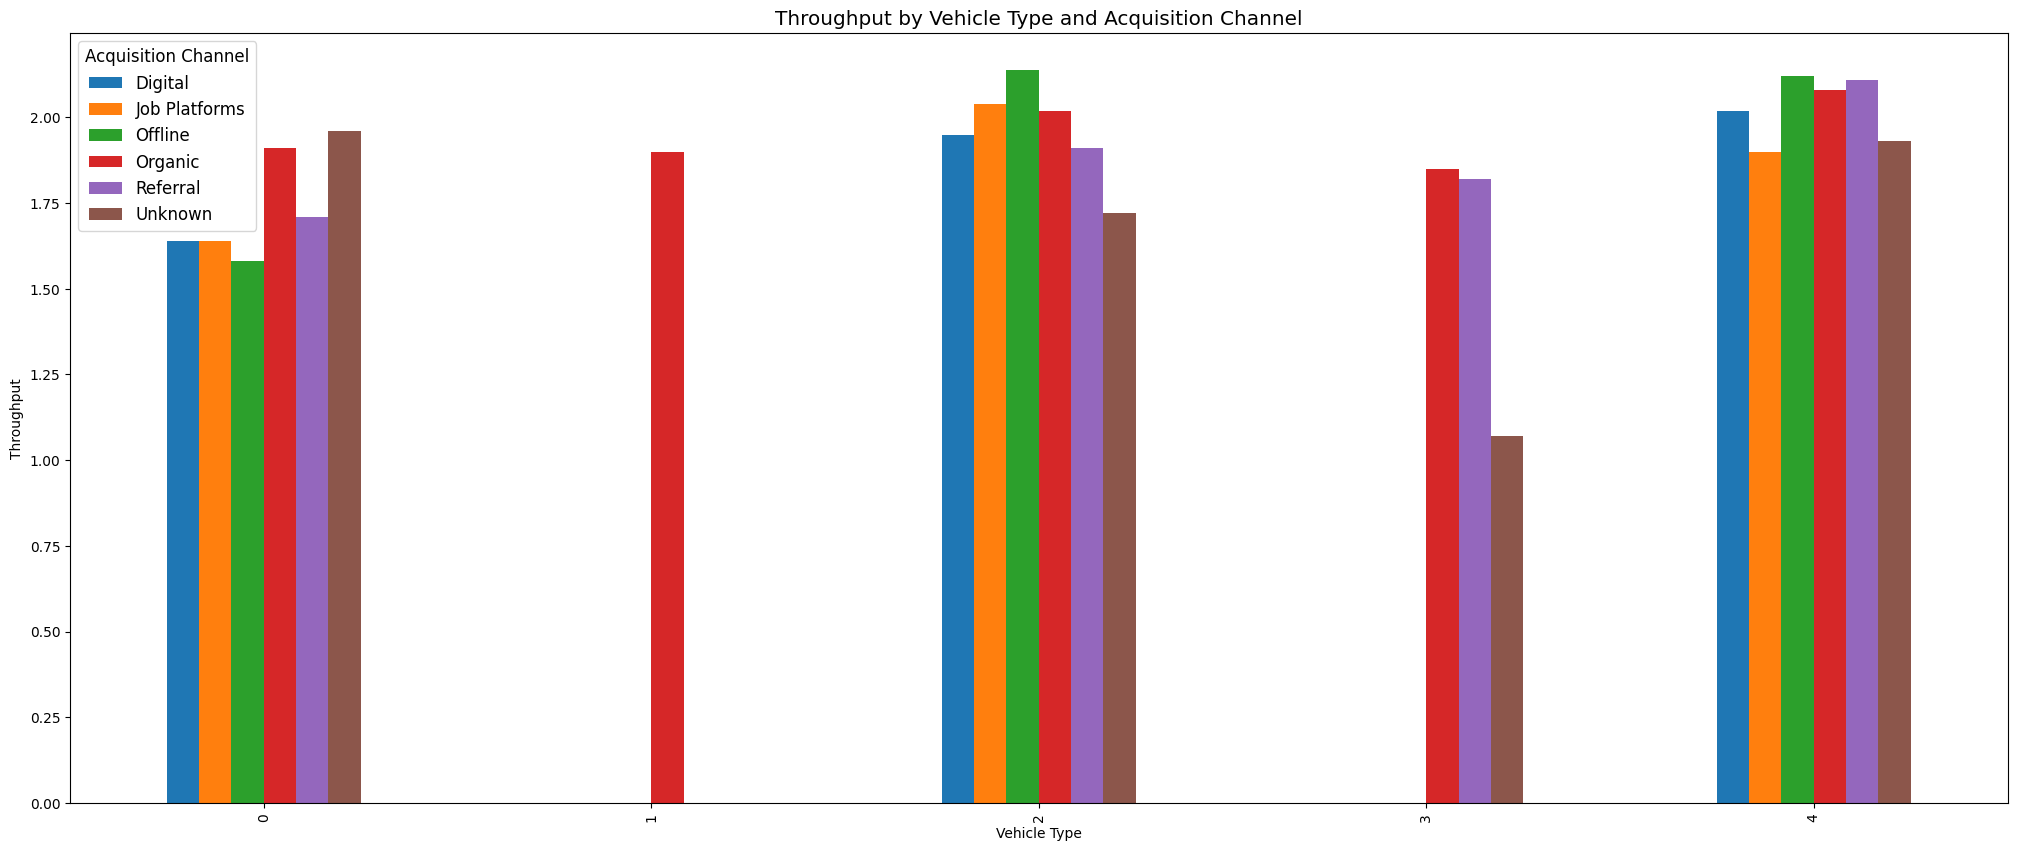

In [ ]:
throughput_matrix.plot(kind='bar', figsize=(25, 10))

plt.rcParams.update({'font.size': 12})

plt.title('Throughput by Vehicle Type and Acquisition Channel')
plt.xlabel('Vehicle Type')
plt.ylabel('Throughput')
plt.legend(title='Acquisition Channel')
plt.show()


Interpretation:

- The referral channel shows good throughput numbers, especially for scooters/motorcycles and bicycles.
- Riders with bicycles have consistent throughput across most channels, with the highest throughput in the Organic channel.
- Scooter/motorcycle generally has high throughput across all channels, particularly in the Offline and Referral channels.
- Motor vehicles generally have higher throughput, especially in the "Offline" channel at 2.14




Distribution of vehicle type across all channels

In [ ]:
vehicle_and_channel_dist = df.groupby(['ACQUISITION_CHANNEL', 'VEHICLE_TYPE'])['RIDER_ID'].nunique()
vehicle_and_channel_dist=pd.DataFrame(vehicle_and_channel_dist)
vehicle_and_channel_dist=vehicle_and_channel_dist.reset_index()

vehicle_and_channel_dist_matrix = vehicle_and_channel_dist.pivot(index='VEHICLE_TYPE', columns='ACQUISITION_CHANNEL', values='RIDER_ID').fillna(0)
vehicle_and_channel_dist_matrix = vehicle_and_channel_dist_matrix.reset_index()
vehicle_and_channel_dist_matrix

ACQUISITION_CHANNEL,VEHICLE_TYPE,Digital,Job Platforms,Offline,Organic,Referral,Unknown
0,Bicycle,622.0,52.0,187.0,2372.0,713.0,84.0
1,Electric Bicycle,0.0,0.0,0.0,3.0,0.0,0.0
2,Motor Vehicle,4.0,5.0,3.0,30.0,2.0,4.0
3,Pedestrian / Walker,0.0,0.0,0.0,4.0,1.0,4.0
4,Scooter / Motorcycle,125.0,10.0,106.0,326.0,500.0,16.0


In [ ]:
#storing dataframe in a spreadsheet
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

sh = gc.create('Distribution Channel-Vehicle Type Sheet')

worksheet = gc.open('Distribution Channel-Vehicle Type Sheet')
sheet1 = worksheet.sheet1

sheet1.update([vehicle_and_channel_dist_matrix.columns.values.tolist()] + vehicle_and_channel_dist_matrix.fillna(-1).values.tolist())

{'spreadsheetId': '1jMPh4V8UhW9ZLcWki4c7dECXqQUpxUdohkM-zr9BvKU',
 'updatedRange': 'Sheet1!A1:G6',
 'updatedRows': 6,
 'updatedColumns': 7,
 'updatedCells': 42}

* Deep-dive into throughput on the basis of location and channel

In [ ]:
# Calculating detailed descriptive statistics for throughput by location

grouped_df = df.groupby(['ACQUISITION_CHANNEL', 'RIDER_ID']).max().reset_index()
descriptive_stats_by_location = grouped_df.groupby(['LOCATION'])['THROUGHPUT_CUMULATIVE'].describe()

descriptive_stats_by_location=descriptive_stats_by_location.round(2)
descriptive_stats_by_location

,count,mean,std,min,25%,50%,75%,max
LOCATION,,,,,,,,
Roo Town,324.0,2.08,0.42,0.0,1.84,2.10,2.33,3.14
Roo York,3369.0,1.98,0.77,0.0,1.50,2.05,2.52,4.35
Roo de Janeiro,1480.0,2.25,0.56,0.0,1.92,2.29,2.61,6.15


Interpretation:
- Roo de Janeiro has the highest mean throughput among the three locations, followed by Roo Town and then Roo York.
- Roo York generally has lower mean throughput across all acquisition channels compared to the other two locations.
- The throughput in Roo York has the highest variability, as indicated by the largest standard deviation.
- Roo de Janeiro also has the highest maximum throughput of 6.15 orders/hour.






Penetration over Location across all channels

In [ ]:
location_and_channel_dist = df.groupby(['ACQUISITION_CHANNEL', 'LOCATION'])['RIDER_ID'].nunique()
location_and_channel_dist=pd.DataFrame(location_and_channel_dist)
location_and_channel_dist=location_and_channel_dist.reset_index()

location_and_channel_dist_matrix = location_and_channel_dist.pivot(index='LOCATION', columns='ACQUISITION_CHANNEL', values='RIDER_ID').fillna(0)
location_and_channel_dist_matrix = location_and_channel_dist_matrix.reset_index()
location_and_channel_dist_matrix

ACQUISITION_CHANNEL,LOCATION,Digital,Job Platforms,Offline,Organic,Referral,Unknown
0,Roo Town,47,19,18,211,14,15
1,Roo York,663,45,264,1244,1115,38
2,Roo de Janeiro,41,3,14,1280,87,55


In [ ]:
location_and_channel_dist_matrix = location_and_channel_dist_matrix.reset_index()
#storing dataframe in a spreadsheet
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

sh = gc.create('Distribution Channel-Location Sheet')

worksheet = gc.open('Distribution Channel-Location Sheet')
sheet1 = worksheet.sheet1

sheet1.update([location_and_channel_dist_matrix.columns.values.tolist()] + location_and_channel_dist_matrix.fillna(-1).values.tolist())

In [ ]:
# Filtering the data to get the sample sizes and mean throughput for all acquisition channels in Roo Town
roo_town_channel_stats = df[df['LOCATION'] == 'Roo Town'].groupby('ACQUISITION_CHANNEL')['THROUGHPUT_CUMULATIVE'].agg(['count', 'mean']).reset_index()

roo_town_channel_stats.rename(columns={'count': 'Sample Size', 'mean': 'Mean Throughput'}, inplace=True)
roo_town_channel_stats


,ACQUISITION_CHANNEL,Sample Size,Mean Throughput
0,Digital,282,1.893121
1,Job Platforms,114,1.777105
2,Offline,108,2.076759
3,Organic,1266,1.955750
4,Referral,84,1.886548
5,Unknown,90,1.688333


In [ ]:
# Grouping the data by 'ACQUISITION_CHANNEL' and 'LOCATION' and calculating the mean throughput
throughput_by_location_and_channel = grouped_df.groupby(['ACQUISITION_CHANNEL', 'LOCATION'])['THROUGHPUT_CUMULATIVE'].mean().reset_index()

# Pivotting the table to create a matrix that shows the mean throughput for each combination of 'LOCATION' and 'ACQUISITION_CHANNEL'
throughput_matrix_location = throughput_by_location_and_channel.pivot(index='LOCATION', columns='ACQUISITION_CHANNEL', values='THROUGHPUT_CUMULATIVE').fillna(0)

throughput_matrix_location=throughput_matrix_location.round(2)
throughput_matrix_location


ACQUISITION_CHANNEL,Digital,Job Platforms,Offline,Organic,Referral,Unknown
LOCATION,,,,,,
Roo Town,2.06,1.97,2.24,2.10,2.02,1.76
Roo York,1.83,1.79,1.91,2.00,2.06,2.22
Roo de Janeiro,2.31,2.34,2.22,2.24,2.41,2.22


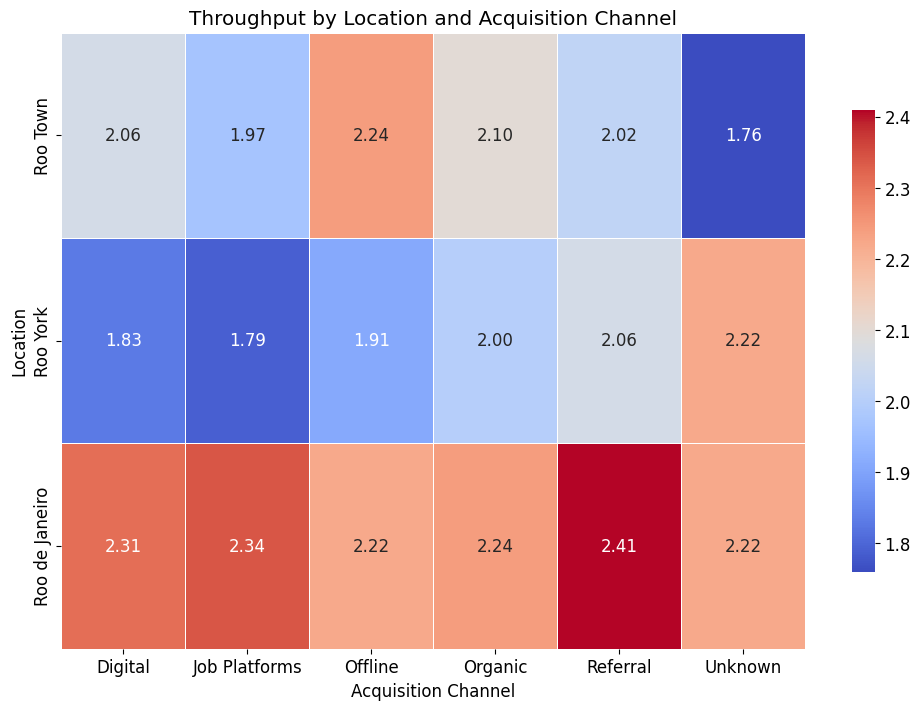

In [ ]:
plt.figure(figsize=(12, 8))

sns.heatmap(throughput_matrix_location, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, cbar_kws={"shrink": .75})

plt.title('Throughput by Location and Acquisition Channel')
plt.xlabel('Acquisition Channel')
plt.ylabel('Location')

plt.show()

In [ ]:
throughput_matrix_location = throughput_matrix_location.reset_index()
#storing dataframe in a spreadsheet
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

sh = gc.create('Throughput-Location Sheet')

worksheet = gc.open('Throughput-Location Sheet')
sheet1 = worksheet.sheet1

sheet1.update([throughput_matrix_location.columns.values.tolist()] + throughput_matrix_location.fillna(-1).values.tolist())

Interpretation:
- Referral channel has the highest throughput in Roo York and Roo De Janeiro

Next step:
- Check the sample size for the "Referral" channel in Roo Town. A smaller sample size could lead to skewed or less reliable results.
- Examine if the throughput for the "Referral" channel in Roo Town has been consistently lower over time or if it's a recent phenomenon.


Inference:

- The "Referral" channel has a sample size of 84 riders, which is on the lower end but comparable to "Job Platforms" and "Offline."

Based on this, it seems that the lower throughput for the "Referral" channel in Roo Town is not necessarily due to a small sample size, as other channels with similar or smaller sample sizes have comparable throughput rates.
Further, investigation is required.

Next Steps:

- Examine if the throughput for the "Referral" channel in Roo Town has been consistently lower over time or if it's a phenomenon for a particular time-period - temporal analysis


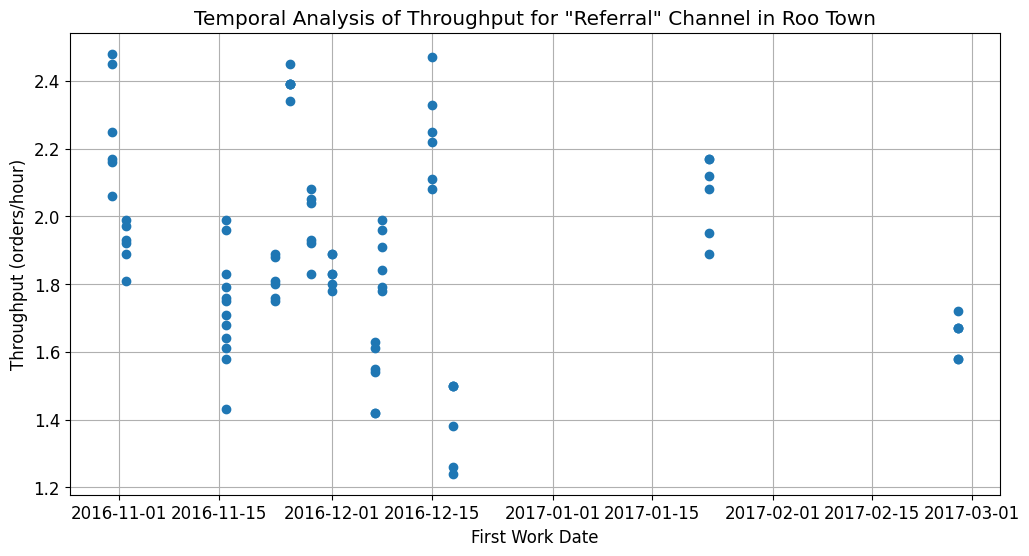

In [ ]:
df['FIRST_WORK_DATE'] = pd.to_datetime(df['FIRST_WORK_DATE'])

# Filtering data for the "Referral" channel in Roo Town and sorting by 'FIRST_WORK_DATE'
referral_roo_town_temporal = df[(df['LOCATION'] == 'Roo Town') & (df['ACQUISITION_CHANNEL'] == 'Referral')].sort_values('FIRST_WORK_DATE')

# Create a temporal analysis plot to see the trend in throughput over time for "Referral" channel in Roo Town
plt.figure(figsize=(12, 6))
plt.plot(referral_roo_town_temporal['FIRST_WORK_DATE'], referral_roo_town_temporal['THROUGHPUT_CUMULATIVE'], marker='o', linestyle='')
plt.title('Temporal Analysis of Throughput for "Referral" Channel in Roo Town')
plt.xlabel('First Work Date')
plt.ylabel('Throughput (orders/hour)')
plt.grid(True)
plt.show()


Interpretation:

- Variability: There is a wide range of throughput values among riders, which is expected given the nature of the work. However, there doesn't appear to be a clear temporal trend.
- No Clear Trend: The throughput doesn't show a clear increasing or decreasing trend over time, indicating that the lower throughput may not be a recent phenomenon.
- Data Points: The data points are dispersed across various first work dates, suggesting that the sample, although small, is not clustered in a specific time frame.

This analysis doesn't provide a clear explanation for why the "Referral" channel in Roo Town has lower throughput compared to other channels or locations. The issue may be complex and multifactorial, requiring a more in-depth investigation possibly involving qualitative methods like rider interviews or surveys.

---

2. ACQUISITION/REFERRAL

In [ ]:
# Calculating referral metrics per rider for each cahnnel
summary_df['REFERRALS_PER_RIDER'] = summary_df['REFERRALS_CUMULATIVE'] / summary_df['NUM_RIDERS']
summary_df['SUCCESSFUL_REFERRALS_PER_RIDER'] = summary_df['SUCCESSFUL_REFERRALS_CUMULATIVE'] / summary_df['NUM_RIDERS']

summary_df=summary_df.reset_index()
summary_df

In [ ]:
summary_per_rider_df=summary_df[['ACQUISITION_CHANNEL','REFERRALS_PER_RIDER','SUCCESSFUL_REFERRALS_PER_RIDER']]
summary_per_rider_df

,ACQUISITION_CHANNEL,REFERRALS_PER_RIDER,SUCCESSFUL_REFERRALS_PER_RIDER
0,Digital,0.747004,0.117177
1,Job Platforms,0.283582,0.074627
2,Offline,0.692568,0.158784
3,Organic,0.484461,0.094333
4,Referral,0.979441,0.261513
5,Unknown,0.555556,0.092593


In [ ]:
summary_per_rider_df['Referral_contribution%']=round((summary_per_rider_df['REFERRALS_PER_RIDER']/summary_per_rider_df['REFERRALS_PER_RIDER'].sum())*100,2)

In [ ]:
summary_per_rider_df['Successful_Referral_contribution%']=round((summary_per_rider_df['SUCCESSFUL_REFERRALS_PER_RIDER']/summary_per_rider_df['SUCCESSFUL_REFERRALS_PER_RIDER'].sum())*100,2)

In [ ]:
summary_per_rider_df

,ACQUISITION_CHANNEL,REFERRALS_PER_RIDER,SUCCESSFUL_REFERRALS_PER_RIDER,Referral_contribution%,Successful_Referral_contribution%
0,Digital,0.747004,0.117177,19.96,14.66
1,Job Platforms,0.283582,0.074627,7.58,9.34
2,Offline,0.692568,0.158784,18.50,19.87
3,Organic,0.484461,0.094333,12.94,11.81
4,Referral,0.979441,0.261513,26.17,32.73
5,Unknown,0.555556,0.092593,14.84,11.59


In [ ]:
#storing dataframe in a spreadsheet
sh = gc.create('Referral per Rider - Summary')

worksheet = gc.open('Referral per Rider - Summary')
sheet1 = worksheet.sheet1

sheet1.update([summary_per_rider_df.columns.values.tolist()] + summary_per_rider_df.fillna(-1).values.tolist())

**Summary:**

On an average, each rgr rider/referral channel rider refers 0.98(~1) rider and 0.26 rider is successfully brought
to the platform. Referral category/rgr channel leads in the no. of referral per rider & no. of successful referral per rider.

2. Acquisition/Referral Success:  The Referral channel has a significant number of riders, which indicates that it is a strong channel for rider acquisition.

Despite having fewer riders than the Organic channel, the RGR channel has most successful referrals among all channels. This suggests a multiplicative effect; riders acquired through RGR are likely to bring in additional riders and the RGR strategy is particularly effective for expanding the rider base through existing riders.


---





Referral count distribution across channels

In [ ]:
df['SUCCESSFUL_REFERRALS_CUMULATIVE']=np.where(pd.isna(df['SUCCESSFUL_REFERRALS_CUMULATIVE'])==True,0,df['SUCCESSFUL_REFERRALS_CUMULATIVE'])
df['REFERRALS_CUMULATIVE']=np.where(pd.isna(df['REFERRALS_CUMULATIVE'])==True,0,df['REFERRALS_CUMULATIVE'])



# Grouping by 'RIDER_ID' within each 'ACQUISITION_CHANNEL' and keeping the last occurrence of each 'RIDER_ID'
grouped_df = df.groupby(['ACQUISITION_CHANNEL', 'RIDER_ID']).last().reset_index()

# Calculating the distribution of successful referrals for unique riders after grouping
grouped_unique_rider_referral_distribution = grouped_df.groupby(['SUCCESSFUL_REFERRALS_CUMULATIVE','ACQUISITION_CHANNEL'])['RIDER_ID'].nunique().unstack(fill_value=0)

grouped_unique_rider_referral_distribution


ACQUISITION_CHANNEL,Digital,Job Platforms,Offline,Organic,Referral,Unknown
SUCCESSFUL_REFERRALS_CUMULATIVE,,,,,,
0.0,703,64,263,2544,987,100
1.0,39,1,23,146,174,6
2.0,5,2,8,33,35,2
3.0,2,0,0,7,10,0
4.0,0,0,2,2,7,0
5.0,0,0,0,2,2,0
6.0,1,0,0,0,1,0
7.0,0,0,0,1,0,0
27.0,1,0,0,0,0,0


In [ ]:
'''grouped_unique_rider_referral_distribution=grouped_unique_rider_referral_distribution.reset_index()
sh = gc.create('Referral count Channel wise - Summary')

worksheet = gc.open('Referral count Channel wise - Summary')
sheet1 = worksheet.sheet1

sheet1.update([grouped_unique_rider_referral_distribution.columns.values.tolist()] + grouped_unique_rider_referral_distribution.fillna(-1).values.tolist())'''

In [ ]:
# Calculating the percentage of users for each successful referral count within each acquisition channel

total_riders_channel_percentage = (grouped_unique_rider_referral_distribution / grouped_unique_rider_referral_distribution.sum()) * 100
total_riders_channel_percentage =pd.DataFrame(total_riders_channel_percentage)
total_riders_channel_percentage=total_riders_channel_percentage.round(2)
total_riders_channel_percentage


ACQUISITION_CHANNEL,Digital,Job Platforms,Offline,Organic,Referral,Unknown
SUCCESSFUL_REFERRALS_CUMULATIVE,,,,,,
0.0,93.61,95.52,88.85,93.02,81.17,92.59
1.0,5.19,1.49,7.77,5.34,14.31,5.56
2.0,0.67,2.99,2.70,1.21,2.88,1.85
3.0,0.27,0.00,0.00,0.26,0.82,0.00
4.0,0.00,0.00,0.68,0.07,0.58,0.00
5.0,0.00,0.00,0.00,0.07,0.16,0.00
6.0,0.13,0.00,0.00,0.00,0.08,0.00
7.0,0.00,0.00,0.00,0.04,0.00,0.00
27.0,0.13,0.00,0.00,0.00,0.00,0.00


In [ ]:
'''total_riders_channel_percentage=total_riders_channel_percentage.reset_index()
sh = gc.create('Referral % Channel wise - Summary')

worksheet = gc.open('Referral % Channel wise - Summary')
sheet1 = worksheet.sheet1

sheet1.update([total_riders_channel_percentage.columns.values.tolist()] + total_riders_channel_percentage.fillna(-1).values.tolist())'''

Summary-
- High Single Referrals in Referral and Organic Channels: Both the "Referral" and "Organic" channels have about 14% and 5% of their users, respectively, making one successful referral.

- Sparse Higher Referrals: Very few users have more than one successful referral, and these are mostly in the "Referral" channel.

- Majority of users have zero successful referrals.

In [ ]:
# Counting the number of users based on the number of successful referrals - overall
# Calculate the total number of unique riders who made 0, 1, 2, ... successful referrals
total_riders_by_referral_count = grouped_df['SUCCESSFUL_REFERRALS_CUMULATIVE'].value_counts().sort_index()
total_riders_by_referral_count=pd.DataFrame(total_riders_by_referral_count)
total_riders_by_referral_count

,SUCCESSFUL_REFERRALS_CUMULATIVE
0.0,4661
1.0,389
2.0,85
3.0,19
4.0,11
5.0,4
6.0,2
7.0,1
27.0,1


In [ ]:
# Calculating the percentage of users for each successful referral count - overall
total_riders_percentage = (total_riders_by_referral_count / total_riders_by_referral_count.sum()) * 100
total_riders_percentage =pd.DataFrame(total_riders_percentage)
total_riders_percentage=total_riders_percentage.round(2)
total_riders_percentage


,SUCCESSFUL_REFERRALS_CUMULATIVE
0.0,90.10
1.0,7.52
2.0,1.64
3.0,0.37
4.0,0.21
5.0,0.08
6.0,0.04
7.0,0.02
27.0,0.02


In [ ]:
'''total_riders_by_referral_count=total_riders_by_referral_count.reset_index()
sh = gc.create('Referral count Overall - Summary')

worksheet = gc.open('Referral count Overall - Summary')
sheet1 = worksheet.sheet1

sheet1.update([total_riders_by_referral_count.columns.values.tolist()] + total_riders_by_referral_count.fillna(-1).values.tolist())'''

In [ ]:
'''total_riders_percentage=total_riders_percentage.reset_index()
sh = gc.create('Referral % Overall - Summary')

worksheet = gc.open('Referral % Overall - Summary')
sheet1 = worksheet.sheet1

sheet1.update([total_riders_percentage.columns.values.tolist()] + total_riders_percentage.fillna(-1).values.tolist())'''

Summary -

Power-law is observed here as only a small fraction of users(~10%) are bringing in more riders and maximizing the RGR scheme.

The data suggests that while a small number of users are actively participating in the referral program, a large portion remains untapped and could be targeted for increased engagement.

Next steps - Treatment strategies must be devised differently for all the segments.

(i) Incentivise/Educate the silent riders. Give extra referral bonus for the first rider they bring.

(ii) Milestone benefits for potentialists. They earn extra on hitting milestones.

(iii) Recognition on the platform along with milestone benefits for the power riders.


---




3. CONVERSION RATE

In [ ]:
# conversion rate is the ratio of successful referrals to total referrals for each acquisition channel
summary_df['CONVERSION_RATE_in_%'] = round((summary_df['SUCCESSFUL_REFERRALS_CUMULATIVE'] / summary_df['REFERRALS_CUMULATIVE'])*100,2)

summary_df['CONVERSION_RATE_in_%'].fillna(0, inplace=True)

conv_summary_df=summary_df[['ACQUISITION_CHANNEL','REFERRALS_CUMULATIVE', 'SUCCESSFUL_REFERRALS_CUMULATIVE', 'CONVERSION_RATE_in_%']]
conv_summary_df

,ACQUISITION_CHANNEL,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE,CONVERSION_RATE_in_%
0,Digital,561.0,88.0,15.69
1,Job Platforms,19.0,5.0,26.32
2,Offline,205.0,47.0,22.93
3,Organic,1325.0,258.0,19.47
4,Referral,1191.0,318.0,26.70
5,Unknown,60.0,10.0,16.67


**Summary**

With a conversion rate of 26.70%, the RGR channel has the highest conversion rate among all acquisition channels.
This suggests that the RGR scheme is highly effective at converting referrals into successful rider acquisitions.



---



4. RETENTION RATE

In [ ]:
# Sorting the DataFrame by 'RIDER_ID' and 'Days_since_acquisition'
df_sorted = df.sort_values(['RIDER_ID', 'DAYS_SINCE_ACQUISITION'])

# Calculating the 'Hours_worked' for each rider by taking the difference in 'Hours_worked_cumulative' for each day
df_sorted['Hours_worked'] = df_sorted.groupby('RIDER_ID')['HOURS_WORKED_CUMULATIVE'].diff().fillna(df['HOURS_WORKED_CUMULATIVE'])

df_sorted

In [ ]:
df_sorted['CHANNEL']=np.where(df['ACQUISITION_CHANNEL']=='Referral','Referral',
                              np.where(df['ACQUISITION_CHANNEL']=='Organic','Organic',
                              'Others'))
#df_sorted

In [ ]:
# Defining the intervals for calculating retention rates
intervals = [7, 14, 28, 56, 84, 168]

# Initializing an empty DataFrame to store the retention rates
retention_rates = pd.DataFrame()

# Looping through each interval to calculate retention rates
for interval in intervals:
    # Identifying active riders at each interval
    active_riders = df_sorted[(df_sorted['DAYS_SINCE_ACQUISITION'] == interval) & (df_sorted['Hours_worked'] > 0)]

    # Counting the unique active riders for each acquisition channel
    active_count = active_riders.groupby('CHANNEL')['RIDER_ID'].nunique()

    # Calculating the total number of riders in the original cohort for each acquisition channel
    total_riders = df_sorted[df_sorted['DAYS_SINCE_ACQUISITION'] == interval].groupby('CHANNEL')['RIDER_ID'].nunique()

    # Calculatig the retention rate for each acquisition channel
    rate = round((active_count / total_riders)*100,2)
    rate.name = f'Retention_Rate_{interval}_days'

    # Appending the retention rate to the retention_rates DataFrame
    retention_rates = pd.concat([retention_rates, rate], axis=1)

retention_rates.fillna(0, inplace=True)
retention_rates.reset_index(inplace=True)

retention_rates



,index,Retention_Rate_7_days,Retention_Rate_14_days,Retention_Rate_28_days,Retention_Rate_56_days,Retention_Rate_84_days,Retention_Rate_168_days
0,Organic,100.0,79.42,76.05,70.38,57.52,54.53
1,Others,100.0,80.59,79.84,71.79,55.30,54.06
2,Referral,100.0,80.59,77.82,70.37,58.55,54.86


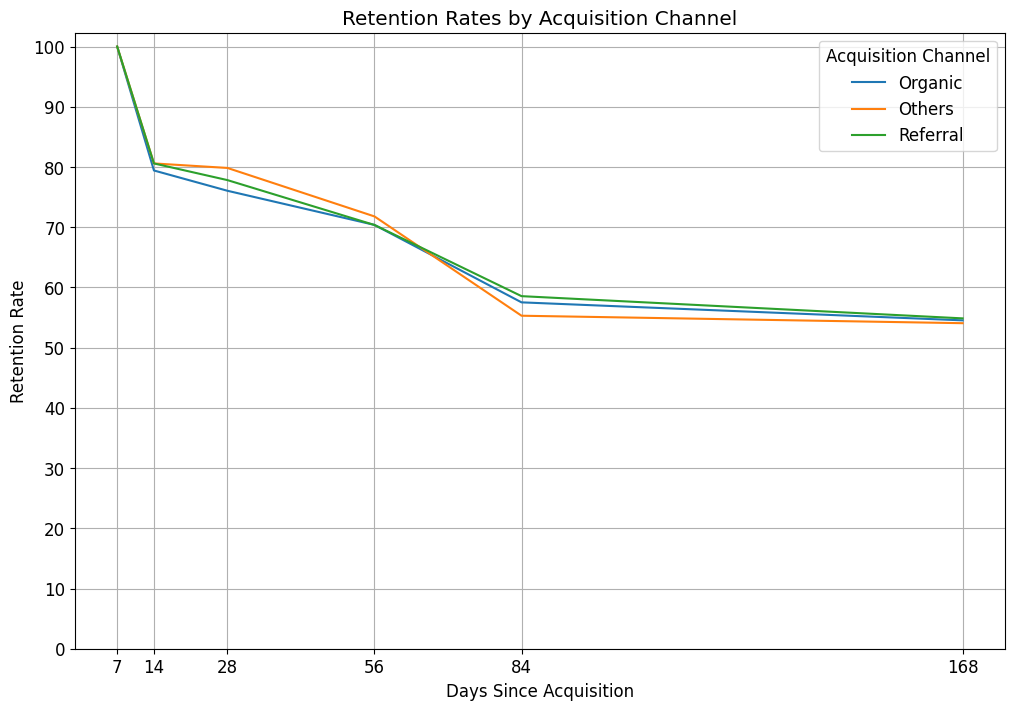

In [ ]:
# Plotting the retention rates
plt.figure(figsize=(12, 8))

for channel in retention_rates['index']:
    plt.plot(intervals, retention_rates.loc[retention_rates['index'] == channel].drop(['index'], axis=1).values.flatten(), label=channel)

plt.title('Retention Rates by Acquisition Channel')
plt.xlabel('Days Since Acquisition')
plt.xticks(intervals)
plt.ylabel('Retention Rate')
plt.yticks(np.arange(0, 110, 10))
plt.legend(title='Acquisition Channel')
plt.grid(True)
plt.show()


Summary

High retention rates across multiple time intervals (7, 14, 28, 56, 84, 168 days) for RGR channel indicate a successful retention strategy. It suggests that riders acquired through referrals are more likely to continue working over time.

(However, the cost of acquisition through the referral channel should also be considered. A high retention rate may not be as impressive if the cost of acquiring each rider through referrals is also high.)



---



**5. APPLICATION APPROVAL TAT**


In [ ]:
grouped_df = df.groupby(['ACQUISITION_CHANNEL', 'RIDER_ID']).last().reset_index()
#grouped_df

In [ ]:
grouped_df['APPLICATION_DATE'] = pd.to_datetime(grouped_df['APPLICATION_DATE'])
grouped_df['APPLICATION_APPROVED_DATE'] = pd.to_datetime(grouped_df['APPLICATION_APPROVED_DATE'])

In [ ]:
grouped_df['Approval_TAT(in_days)'] = (grouped_df['APPLICATION_APPROVED_DATE'] - grouped_df['APPLICATION_DATE']).dt.days


In [ ]:
average_tat = grouped_df['Approval_TAT(in_days)'].mean()
average_tat

83.46902478017586

In [ ]:
average_tat_by_channel = grouped_df.groupby('ACQUISITION_CHANNEL')['Approval_TAT(in_days)'].mean()
average_tat_by_channel_df = pd.DataFrame(average_tat_by_channel)
average_tat_by_channel_df=average_tat_by_channel_df.round(2)

average_tat_by_channel_df

,Approval_TAT(in_days)
ACQUISITION_CHANNEL,
Digital,85.00
Job Platforms,82.99
Offline,104.54
Organic,78.75
Referral,87.94
Unknown,NaN


In [ ]:
##Calculating Approval TAT for each location & channel
average_tat_by_channel_location_df = grouped_df.groupby(['ACQUISITION_CHANNEL', 'LOCATION'])['Approval_TAT(in_days)'].mean().reset_index()

# Pivotting the table to create a matrix that shows the approval tat for each combination of 'LOCATION' and 'ACQUISITION_CHANNEL'
average_tat_by_channel_location = average_tat_by_channel_location_df.pivot(index='LOCATION', columns='ACQUISITION_CHANNEL', values='Approval_TAT(in_days)').fillna(0)

average_tat_by_channel_location=average_tat_by_channel_location.round(2)
average_tat_by_channel_location


ACQUISITION_CHANNEL,Digital,Job Platforms,Offline,Organic,Referral,Unknown
LOCATION,,,,,,
Roo Town,33.27,83.32,28.50,62.84,22.00,0.0
Roo York,88.43,86.29,109.82,94.61,90.34,0.0
Roo de Janeiro,85.42,31.33,103.43,65.85,67.53,0.0


Summary -
- Roo Town generally has faster approval times compared to the other locations, especially for the "Referral" and "Offline" channels.
- Roo York shows higher TAT across all channels.
- The "Referral" channel has fast approval times in Roo Town but takes longer in Roo York and Roo de Janeiro.


In [ ]:
##Calculating Approval TAT for each vehicle-type & channel
average_tat_by_channel_vehicle_df = grouped_df.groupby(['ACQUISITION_CHANNEL', 'VEHICLE_TYPE'])['Approval_TAT(in_days)'].mean().reset_index()

# Pivotting the table to create a matrix that shows the mean approval tat for each combination of 'VEHICLE_TYPE' and 'ACQUISITION_CHANNEL'
average_tat_by_channel_vehicle = average_tat_by_channel_vehicle_df.pivot(index='VEHICLE_TYPE', columns='ACQUISITION_CHANNEL', values='Approval_TAT(in_days)').fillna(0)

average_tat_by_channel_vehicle=average_tat_by_channel_vehicle.round(2)
average_tat_by_channel_vehicle


ACQUISITION_CHANNEL,Digital,Job Platforms,Offline,Organic,Referral,Unknown
VEHICLE_TYPE,,,,,,
Bicycle,72.76,78.33,79.21,73.87,71.03,0.0
Electric Bicycle,0.00,0.00,0.00,21.50,0.00,0.0
Motor Vehicle,77.00,16.60,11.33,53.57,10.00,0.0
Pedestrian / Walker,0.00,0.00,0.00,26.50,0.00,0.0
Scooter / Motorcycle,147.19,140.40,151.39,117.38,112.41,0.0


Summary:
- Riders with bicycles have consistent TAT across all channels, with the shortest time seen in the "Referral" channel.
- For motor vehicles, the referral channel seems highly efficient with a TAT of just 10.0 days.
- Scooter/motorcycle shows the longest TAT across all channels, particularly in the "Offline" channel at 151.39 days

---



**6. TIME TO START WORK**

In [ ]:
grouped_df = df.groupby(['ACQUISITION_CHANNEL', 'RIDER_ID']).last().reset_index()
#grouped_df

In [ ]:
grouped_df['APPLICATION_APPROVED_DATE'] = pd.to_datetime(grouped_df['APPLICATION_APPROVED_DATE'])
grouped_df['FIRST_WORK_DATE'] = pd.to_datetime(grouped_df['FIRST_WORK_DATE'])

In [ ]:
grouped_df['APPROVAL_TO_FIRST_WORK_DAYS'] = (grouped_df['FIRST_WORK_DATE'] - grouped_df['APPLICATION_APPROVED_DATE']).dt.days
len(grouped_df)

5173

In [ ]:
#handling data irregularity (dropping those entries where application approved date is after first work date)
grouped_df=grouped_df[grouped_df['APPROVAL_TO_FIRST_WORK_DAYS']>=0]
len(grouped_df)

4847

In [ ]:
average_onboarding_tat = grouped_df['APPROVAL_TO_FIRST_WORK_DAYS'].mean()
average_onboarding_tat

3.9678835028924797

In [ ]:
average_onboarding_by_channel = grouped_df.groupby('ACQUISITION_CHANNEL')['APPROVAL_TO_FIRST_WORK_DAYS'].mean()

average_onboarding_by_channel_df = pd.DataFrame(average_onboarding_by_channel)
average_onboarding_by_channel_df=average_onboarding_by_channel_df.round(2)

average_onboarding_by_channel_df

,APPROVAL_TO_FIRST_WORK_DAYS
ACQUISITION_CHANNEL,
Digital,5.12
Job Platforms,9.66
Offline,5.85
Organic,6.50
Referral,5.11


In [ ]:
##Calculating APPROVAL_TO_FIRST_WORK_DAYS for each location & channel
average_onboarding_by_channel_location_df = grouped_df.groupby(['ACQUISITION_CHANNEL', 'LOCATION'])['APPROVAL_TO_FIRST_WORK_DAYS'].mean().reset_index()

# Pivotting the table to create a matrix that shows the mean APPROVAL_TO_FIRST_WORK_DAYS for each combination of 'LOCATION' and 'ACQUISITION_CHANNEL'
average_onboarding_by_channel_location = average_onboarding_by_channel_location_df.pivot(index='LOCATION', columns='ACQUISITION_CHANNEL', values='APPROVAL_TO_FIRST_WORK_DAYS').fillna(0)

average_onboarding_by_channel_location=average_onboarding_by_channel_location.round(2)
average_onboarding_by_channel_location


ACQUISITION_CHANNEL,Digital,Job Platforms,Offline,Organic,Referral
LOCATION,,,,,
Roo Town,3.9,17.00,7.60,7.17,3.25
Roo York,5.2,6.51,5.97,6.48,5.04
Roo de Janeiro,5.1,17.67,1.86,6.43,6.32


Summary:

Referral channel has fairly consistent average days and is fairly quick to start across all the three locations.


Fastest to Start:
- In Roo Town, riders from the "Digital" channel start the quickest, within 3.9 days.
- In Roo York, riders from the "Referral" channel start in about 3.1 days.
- In Roo de Janeiro, riders from the "Offline" channel start the quickest, within 1.86 days.

Slowest to Start:
- In Roo Town, riders from the "Job platforms" channel take the longest time to start (17 days).
- In Roo York, "Job Platforms" have the longest average time (6.51 days).
- In Roo de Janeiro, "Job Platforms" also take an exceptionally long time (17.67 days).




In [ ]:
average_onboarding_by_channel_vehicle_df = grouped_df.groupby(['ACQUISITION_CHANNEL', 'VEHICLE_TYPE'])['APPROVAL_TO_FIRST_WORK_DAYS'].mean().reset_index()
#average_onboarding_by_channel_vehicle_df

In [ ]:
##Calculating APPROVAL_TO_FIRST_WORK_DAYSfor each vehicle & channel
average_onboarding_by_channel_vehicle_df = grouped_df.groupby(['ACQUISITION_CHANNEL', 'VEHICLE_TYPE'])['APPROVAL_TO_FIRST_WORK_DAYS'].mean().reset_index()

# Pivotting the table to create a matrix that shows the mean APPROVAL_TO_FIRST_WORK_DAYS for each combination of 'VEHICLE_TYPE' and 'ACQUISITION_CHANNEL'
average_onboarding_by_vehicle_location = average_onboarding_by_channel_vehicle_df.pivot(index='VEHICLE_TYPE', columns='ACQUISITION_CHANNEL', values='APPROVAL_TO_FIRST_WORK_DAYS').fillna(0)

average_onboarding_by_vehicle_location=average_onboarding_by_vehicle_location.round(2)
average_onboarding_by_vehicle_location


ACQUISITION_CHANNEL,Digital,Job Platforms,Offline,Organic,Referral
VEHICLE_TYPE,,,,,
Bicycle,5.13,10.84,5.68,6.37,4.87
Electric Bicycle,0.00,0.00,0.00,2.00,0.00
Motor Vehicle,10.33,1.75,2.33,3.53,2.50
Pedestrian / Walker,0.00,0.00,0.00,125.50,0.00
Scooter / Motorcycle,4.97,6.90,6.24,6.88,5.46


Summary -

- Riders acquired through RGR tend to start quickly.

- Riders using motor vehicle are relatively quick to start.

- Data Quality Issues: Negative values for "APPROVAL_TO_FIRST_WORK_DAYS" indicate data quality or entry issues, as negative time durations don't make sense in this context.



---





**Impact of time to start working on throughput and referral**


```
spearman correlation analysis for testing the hypothesis that starting to work soon after approval means the rider will have a higher throughput or more successful referrals, based on this dataset.
```



In [ ]:

df['APPLICATION_DATE'] = pd.to_datetime(df['APPLICATION_DATE'])
df['APPLICATION_APPROVED_DATE'] = pd.to_datetime(df['APPLICATION_APPROVED_DATE'])
df['FIRST_WORK_DATE'] = pd.to_datetime(df['FIRST_WORK_DATE'])

# Calculating the duration between approval and first work in days
df['APPROVAL_TO_FIRST_WORK_DAYS'] = (df['FIRST_WORK_DATE'] - df['APPLICATION_APPROVED_DATE']).dt.days

# Filtering out rows where any of the relevant columns have missing values
df_for_correlation = df.dropna(subset=['APPROVAL_TO_FIRST_WORK_DAYS', 'THROUGHPUT_CUMULATIVE', 'SUCCESSFUL_REFERRALS_CUMULATIVE'])

# Performing Spearman correlation to examine the relationships
correlation_throughput, p_value_throughput = spearmanr(df_for_correlation['APPROVAL_TO_FIRST_WORK_DAYS'], df_for_correlation['THROUGHPUT_CUMULATIVE'])
correlation_referrals, p_value_referrals = spearmanr(df_for_correlation['APPROVAL_TO_FIRST_WORK_DAYS'], df_for_correlation['SUCCESSFUL_REFERRALS_CUMULATIVE'])

hypothesis_results = {
        'Correlation with Throughput': correlation_throughput,
        'P-value with Throughput': p_value_throughput,
        'Correlation with Successful Referrals': correlation_referrals,
        'P-value with Successful Referrals': p_value_referrals
    }


hypothesis_results


{'Correlation with Throughput': -0.06585747057407289,
 'P-value with Throughput': 2.8406107054578697e-30,
 'Correlation with Successful Referrals': -0.014370261069816185,
 'P-value with Successful Referrals': 0.012693274984825592}

Interpretation:
- Throughput: The correlation coefficient is -0.067, which is close to zero, indicating a very weak negative relationship.
The p-value is significantly low, suggesting that the correlation is statistically significant, although weak.

- Successful Referrals: The correlation coefficient is
−0.024, indicating an even weaker negative relationship.
The p-value is 0.138, which is above the commonly used threshold of 0.05, indicating that the result is not statistically significant.

Conclusion:
Starting to work soon after approval does not necessarily mean the rider will have a higher throughput or more successful referrals, based on this dataset. The correlation is weak and, in the case of successful referrals, not even statistically significant.

But improving the time to start work will help in closing the feedback loop of referral fast(referred riders will be quickly starting the work which will incentivise even the referres to bring more riders and the process will end soon.) This can be one of the hygiene metric which should be kept in check and increase in time to start work would highlight process inefficiences/gaps.



---


